In [1]:
# Environment setup: conda env create -f requirements.yaml
# Activate environment: conda activate islets-omics

%load_ext autoreload
%autoreload 2

import sys

import pandas as pd

import matplotlib.pyplot as plt

# get data
data = pd.read_pickle("./data/datasets/islets_rna_prot_dataset.pkl")
sample_metadata = pd.read_pickle("./data/datasets/islets_rna_prot_sample_metadata.pkl")
feature_metadata = pd.read_pickle("./data/datasets/islets_rna_prot_feature_metadata.pkl")

sys.path.append("src.py")
from src import Utils

### [F07] Sample-sample correlation heatmap for proteomics and transcriptomics

Sample-Sample correlation heatmaps with corresponding labels. First with Transcriptomics & Proteomics together, then separate, resulting in three heatmaps.

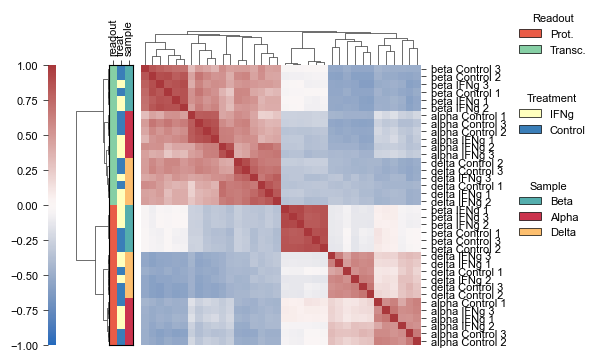

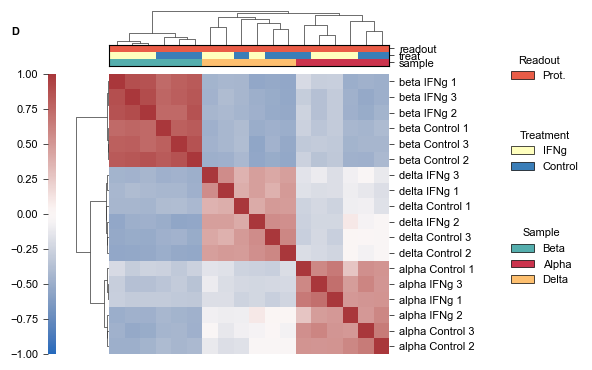

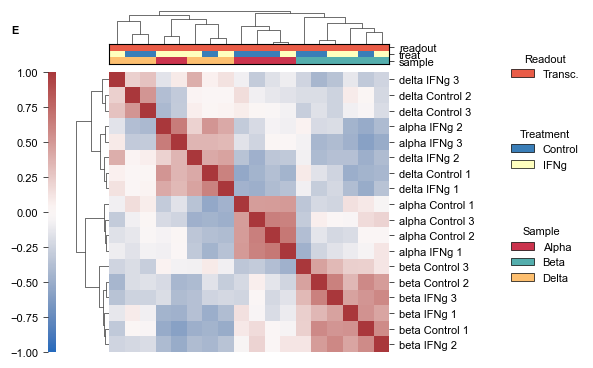

In [2]:
# impute data with gaussian to avoid nans
data_imputed = Utils.impute_gaussian(data)

# standardize data features
data_imputed_scaled = Utils.scale_and_center(data_imputed)

# compute correlation matrix of rows
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

# label parsing dict and function
label_parse_dict = {
    'readout:' : 'Readout',
    'treat:' : 'Treatment',
    'sample:' : 'Sample',
    'proteomics' : 'Prot.',
    'transcriptomics' : 'Transc.',
    'ifng' : 'IFNg',
    'control' : 'Control',
    'alpha' : 'Alpha',
    'beta' : 'Beta',
    'delta' : 'Delta',
}

def label_parse_regex(l):
    l = l.replace('_', ' ')
    l = l.replace('control', 'Control')
    l = l.replace('ifng', 'IFNg')
    l = l.replace('proteomics', '')
    l = l.replace('transcriptomics', '')

    return l

# -----------------------------------

# make heatmap 
hm, x_linkage, y_linkage = Utils.annotated_heatmap(
    data = sample_cm,
    sample_metadata = sample_metadata,
    feature_metadata = sample_metadata,
    colorbars_y = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
)

# save plot
Utils.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    paper_width = "single",
    paper_height = "single",
)

# -----------------------------------

# make heatmap of proteomics data
data_p = data[sample_metadata['readout'] == 'proteomics']
data_imputed = Utils.impute_gaussian(data_p)
data_imputed_scaled = Utils.scale_and_center(data_imputed)
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

hm, x_linkage, y_linkage = Utils.annotated_heatmap(
    data = sample_cm,
    sample_metadata = sample_metadata[sample_metadata['readout'] == 'proteomics'],
    feature_metadata = sample_metadata[sample_metadata['readout'] == 'proteomics'],
    colorbars_x = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    legend_right_offset = .32,
    legend_right_lineheight = 0.05,
    legend_right_headspace = 0.05,
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
    annotated_rows = True,
    enumerate_plot = "D",
)

# save plot
Utils.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap_proteomics.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    paper_width = "single",
    paper_height = "single",
)

# -----------------------------------

# make heatmap of transcriptomics data
data_t = data[sample_metadata['readout'] == 'transcriptomics']
data_imputed = Utils.impute_gaussian(data_t)
data_imputed_scaled = Utils.scale_and_center(data_imputed)
sample_cm = data_imputed_scaled.T.corr(method = 'pearson')

hm, x_linkage, y_linkage = Utils.annotated_heatmap(
    data = sample_cm,
    sample_metadata = sample_metadata[sample_metadata['readout'] == 'transcriptomics'],
    feature_metadata = sample_metadata[sample_metadata['readout'] == 'transcriptomics'],
    colorbars_x = ['readout', 'treat', 'sample'],
    cluster_across_x = True,
    cluster_across_y = True,
    show_dendrogram_y = True,
    show_dendrogram_x = True,
    show_xlabels = False,
    show_ylabels = True,
    legends_position = 'right',
    legend_right_offset = .32,
    legend_right_lineheight = 0.05,
    legend_right_headspace = 0.05,
    label_parse_dict = label_parse_dict,
    label_parse_regex = label_parse_regex,
    annotated_rows = True,
    enumerate_plot = "E",
)

Utils.save_figure(
    fig = hm.figure,
    filename = "figure_07_sample_sample_correlation_heatmap_transcriptomics.svg",
    output_dir = "./assets/20250423_revision_figures/",
    dpi = 300,
    paper_width = "single",
    paper_height = "single",
)
